### RAFFI ARGIANDA
### 221351112

In [20]:
import pandas as pd

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv('pelanggan.csv')
df.head()

,Customer_ID,Age,Gender,City,Annual_Income,Purchase_Frequency,Average_Spending_Per_Transaction,Preferred_Product_Category,Total_Spent
0,CUST-0001,58,Male,Bandung,74452590,20,2506379,Electronics,50127580
1,CUST-0002,25,Male,Makassar,20948354,2,1034739,Electronics,2069478
2,CUST-0003,19,Male,Surabaya,187117265,2,2054445,Health & Beauty,4108890
3,CUST-0004,65,Male,Jakarta,87943960,8,2085052,Electronics,16680416
4,CUST-0005,35,Female,Jakarta,23276996,9,2871946,Health & Beauty,25847514


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Customer_ID                       2000 non-null   object
 1   Age                               2000 non-null   int64 
 2   Gender                            2000 non-null   object
 3   City                              2000 non-null   object
 4   Annual_Income                     2000 non-null   int64 
 5   Purchase_Frequency                2000 non-null   int64 
 6   Average_Spending_Per_Transaction  2000 non-null   int64 
 7   Preferred_Product_Category        2000 non-null   object
 8   Total_Spent                       2000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 140.8+ KB


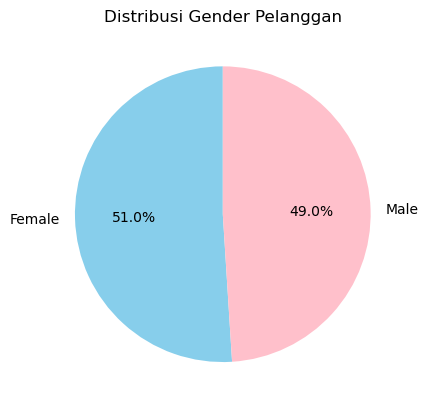

In [23]:
# Pie chart distribusi gender pelanggan
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts,
        labels = gender_counts.index,
        autopct = '%1.1f%%',
        colors = ['skyblue', 'pink'],
        startangle = 90)
plt.title('Distribusi Gender Pelanggan')
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_8524\1187210204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,


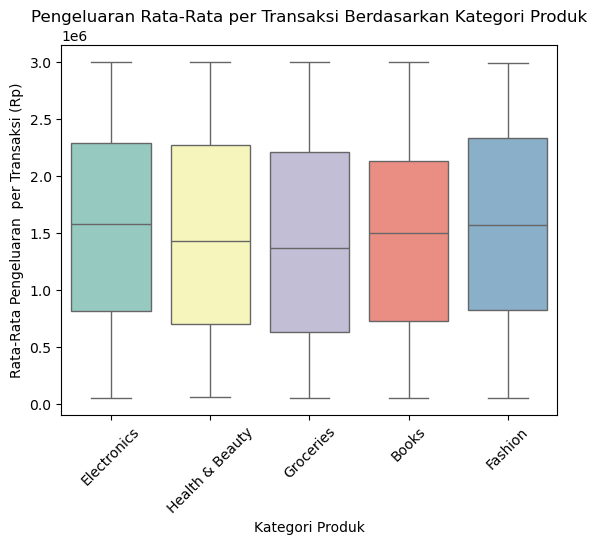

In [24]:
# BOXPLOT pengeluaran rata-rata per transaksi berdasarkan kategori produk
sns.boxplot(data = df,
            x = 'Preferred_Product_Category',
            y = 'Average_Spending_Per_Transaction',
            palette = 'Set3')
plt.title('Pengeluaran Rata-Rata per Transaksi Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-Rata Pengeluaran  per Transaksi (Rp)')
plt.xticks(rotation = 45)
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_8524\4107427343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,


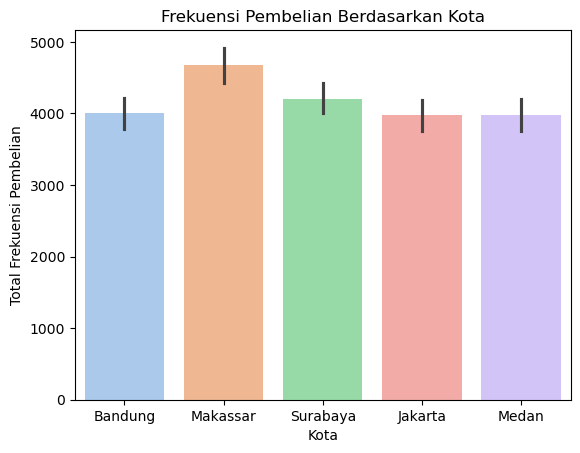

In [25]:
# Frekuensi Pembelian berdasarkan kota
sns.barplot(data = df,
            x = 'City',
            y = 'Purchase_Frequency',
            estimator = sum,
            palette = 'pastel')
plt.title('Frekuensi Pembelian Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Total Frekuensi Pembelian')
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_8524\2638495449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,


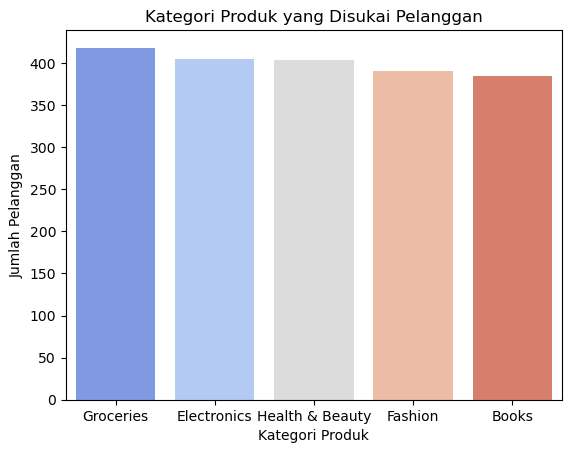

In [26]:
# Bar Plot Kategori produk yang disukai
sns.countplot(data = df,
              x = 'Preferred_Product_Category',
              order = df['Preferred_Product_Category'].value_counts().index,
              palette = 'coolwarm')
plt.title('Kategori Produk yang Disukai Pelanggan')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pelanggan')
plt.show()

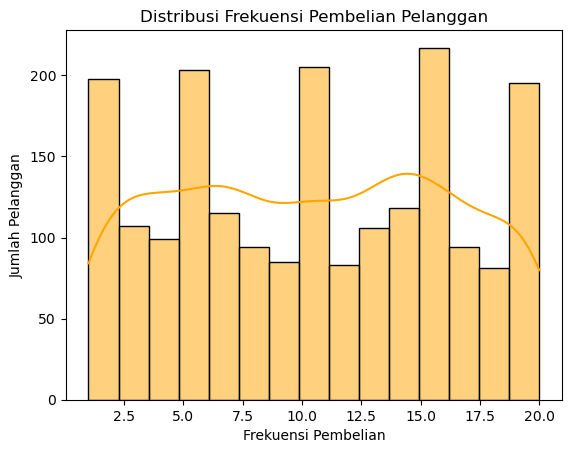

In [27]:
# Distribusi Frekuensi pembelian pelanggan
sns.histplot(df['Purchase_Frequency'],
             kde = True,
             color = 'orange',
             bins = 15)
plt.title('Distribusi Frekuensi Pembelian Pelanggan')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

In [28]:
# Memilih fitur untuk clustering
features = ['Annual_Income',
            'Purchase_Frequency',
            'Average_Spending_Per_Transaction',
            'Total_Spent']

In [29]:
# Standarisasi Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [30]:
# Menentukan jumlah cluster menggunakan metode elbow
inertia = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

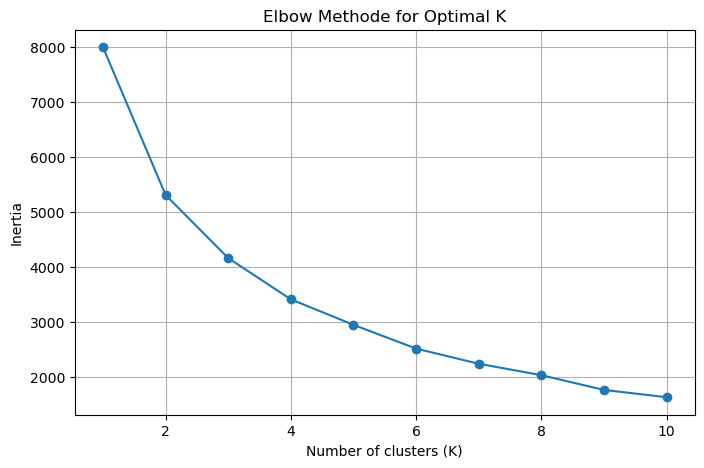

In [31]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker = 'o')
plt.title('Elbow Methode for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [32]:
# Menggunakan jumlah cluster optimal
optimal_k = 4 # Berdasarkan elbow method (misalnya)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [33]:
# Mengurangi dimensi data untuk visualisasi
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(scaled_features)

In [34]:
# Warma untuk setiap cluster
colors = ['blue', 'green', 'red', 'purple']

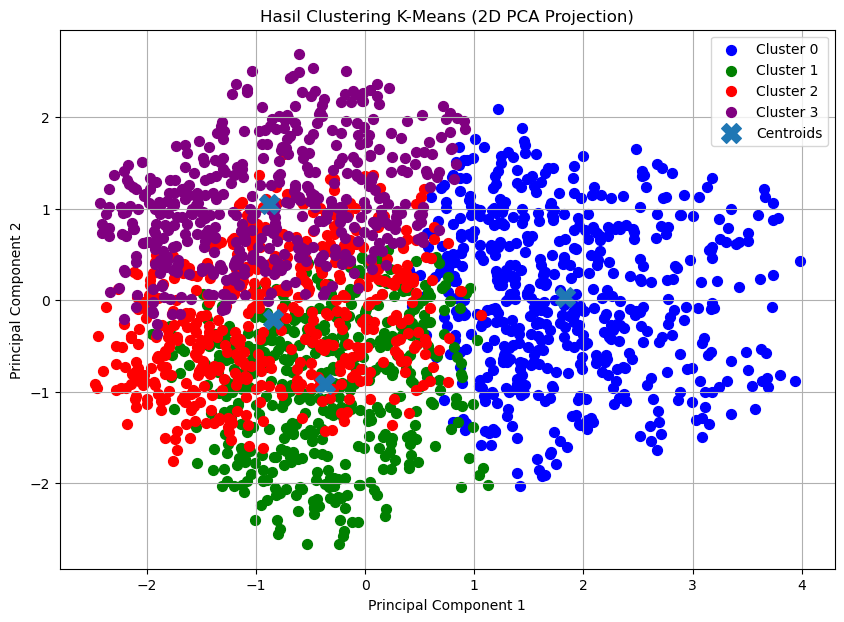

In [35]:
# Plot hasil clustering
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k) :
    cluster_points = reduced_features[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], 
                cluster_points[:, 1],
                s = 50,
                label = f'Cluster {cluster}',
                color = colors[cluster])
    
# Menambahkan centroid pada ploy
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], 
            centroids_reduced[:, 1],
            s = 200,
            marker = 'X',
            label = 'Centroids')

# Menambahkan detail plot
plt.title('Hasil Clustering K-Means (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [36]:
df.head()

,Customer_ID,Age,Gender,City,Annual_Income,Purchase_Frequency,Average_Spending_Per_Transaction,Preferred_Product_Category,Total_Spent,Cluster
0,CUST-0001,58,Male,Bandung,74452590,20,2506379,Electronics,50127580,0
1,CUST-0002,25,Male,Makassar,20948354,2,1034739,Electronics,2069478,3
2,CUST-0003,19,Male,Surabaya,187117265,2,2054445,Health & Beauty,4108890,2
3,CUST-0004,65,Male,Jakarta,87943960,8,2085052,Electronics,16680416,3
4,CUST-0005,35,Female,Jakarta,23276996,9,2871946,Health & Beauty,25847514,0


In [37]:
features

['Annual_Income',
 'Purchase_Frequency',
 'Average_Spending_Per_Transaction',
 'Total_Spent']

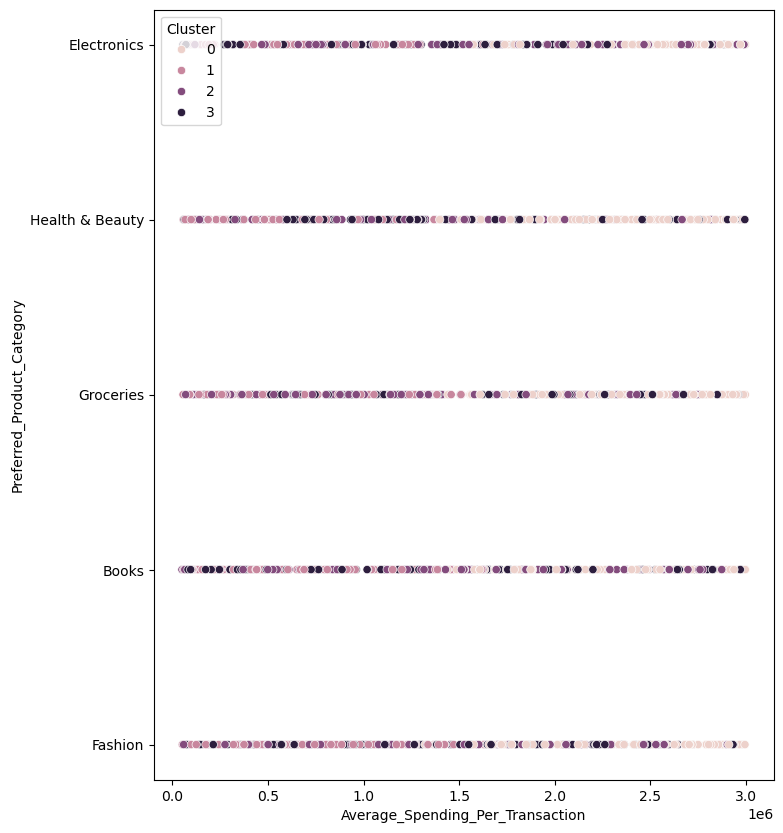

In [38]:
plt.figure(figsize = (8,10))
sns.scatterplot(data = df, x = 'Average_Spending_Per_Transaction', y = 'Preferred_Product_Category', hue = 'Cluster')
plt.show()